In [2]:
import dde.time_series.time_series_functions

In [3]:
from importlib import reload
import dde
reload(dde.time_series.time_series_functions)

<module 'dde.time_series.time_series_functions' from '/home/jack/Desktop/uni/DDE/project/dde/time_series/time_series_functions.py'>

In [4]:
import pandas as pd

pd.__version__

'1.4.3'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [40, 10]


import seaborn as sns
sns.set_style('darkgrid')



In [6]:
dates_missing_feature_matrices = ['2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08']

# Importing and viewing the data

Let's first import both our feature matrices (one for the experts and one for the men-on-the-street):

In [7]:
import pandas as pd

path = 'data/feature_matrix/'

exp_feature_matrix = pd.read_pickle(path + 'exp_feature_matrix.pkl')
men_feature_matrix = pd.read_pickle(path + 'men_feature_matrix.pkl')

In [8]:
men_feature_matrix

,ym,bitcoin,energy,finance,inflation,real_estate
0,2013-06,"[0.0, 0.9205565555555554, 0.0]","[0.5410010000000001, 0.7069100909090908, 0.0]","[0.0, 0.7253086923076923, 0.582501]","[0.459001, 0.7783694210526316, 0.555001]","[0.0, 0.838101, 0.5330010000000001]"
1,2013-07,"[0.0, 0.8295343333333333, 0.0]","[0.0, 0.8415009999999999, 0.0]","[0.0, 0.754751, 0.0]","[0.450001, 0.780501, 0.514251]","[0.0, 0.7891210000000001, 0.560001]"
2,2013-08,"[0.0, 0.688101, 0.527001]","[0.0, 0.816174913043478, 0.728001]","[0.0, 0.9040009999999999, 0.0]","[0.528001, 0.8374203548387097, 0.580001]","[0.0, 0.7798494848484848, 0.42500099999999996]"
3,2013-09,"[0.0, 0.7870635, 0.0]","[0.699001, 0.7705426666666666, 0.505001]","[0.0, 0.7528760000000001, 0.0]","[0.42900099999999997, 0.7835971538461537, 0.0]","[0.0, 0.7594127647058824, 0.0]"
4,2013-10,"[0.606501, 0.8006676666666666, 0.0]","[0.0, 0.775608142857143, 0.5520010000000001]","[0.0, 0.7490010000000001, 0.0]","[0.0, 0.7633121111111109, 0.5628343333333334]","[0.0, 0.7472867142857142, 0.6860010000000001]"
...,...,...,...,...,...,...
91,2022-01,"[0.5753343333333334, 0.78864506779661, 0.52766...","[0.45480099999999996, 0.7606145458167329, 0.66...","[0.5104010000000001, 0.776305347826087, 0.626001]","[0.5902093333333334, 0.749355401805869, 0.6417...","[0.5678581428571429, 0.7490356534653466, 0.600..."
92,2022-02,"[0.5425394615384614, 0.747794893129771, 0.6480...","[0.6334555454545454, 0.7485674062500001, 0.645...","[0.5823343333333334, 0.7354093333333332, 0.674...","[0.5260779230769231, 0.7389324079422382, 0.593...","[0.5649593333333334, 0.7533179811320755, 0.604..."
93,2022-03,"[0.5608898888888889, 0.7425464545454546, 0.628...","[0.5715438571428572, 0.7546993240223464, 0.624...","[0.6439240769230768, 0.7697849195979899, 0.593...","[0.5566802452830188, 0.7520856905537459, 0.676...","[0.536521, 0.7386625384615384, 0.6635843333333..."
94,2022-04,"[0.352501, 0.7510701823899371, 0.5722232222222...","[0.6580010000000002, 0.7274445261707989, 0.587...","[0.5403343333333334, 0.7397232222222222, 0.602...","[0.5503224285714287, 0.7439961690821256, 0.614...","[0.5565635, 0.760927153846154, 0.5920919090909..."


And now the inflation data:

In [9]:
inflation_data = pd.read_csv('data/feature_matrix/inflation_data.csv')
inflation_data['DATE'] = inflation_data['DATE'].apply(lambda x: x[:7]) # now the dates are in the same format
inflation_data = inflation_data[~inflation_data['DATE'].isin(dates_missing_feature_matrices)]

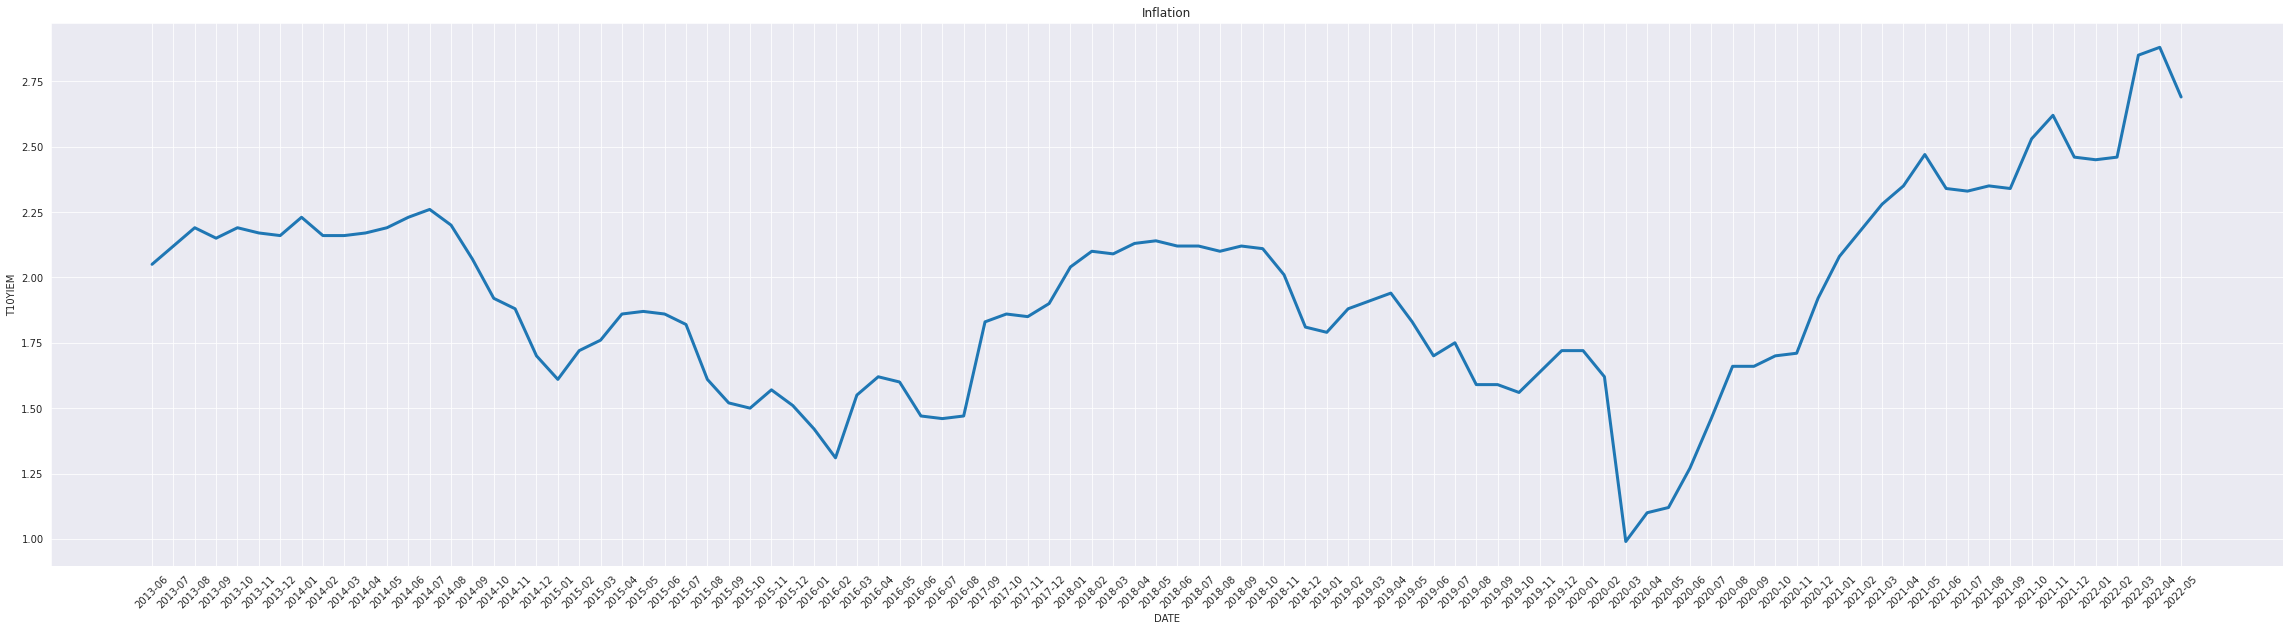

In [10]:

plt.figure(figsize=(40, 10))

sns.lineplot(data=inflation_data, x = 'DATE', y='T10YIEM',
             palette='viridis',legend='full',lw=3)

plt.title('Inflation')
plt.xticks(rotation=45)
plt.show()

## Moving average

Moreover let's plot the moving average of the inflation using a window of $4$ months:

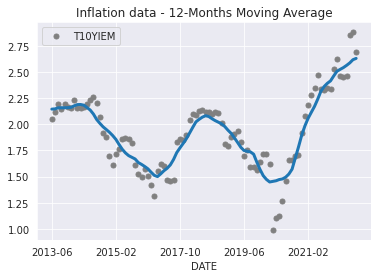

In [11]:

tmp = inflation_data.set_index('DATE')


moving_average = tmp['T10YIEM'].rolling(
    window=12,       # 12 month window
    center=True,
    min_periods=1,
).mean()

ax = tmp.plot(style=".",
                         color="0.5",
                         markersize = 10)


moving_average.plot(
    ax=ax, linewidth=3, title="Inflation data - 12-Months Moving Average", legend=False,
)



plt.show()

# Evaluation

## Splitting train/test

We split at the year $2019$, so the training set will range from $2013-06$ to $2019-12$, and the test set will range from $2019-01$ to $2022-05$.

In [12]:
split_index = 67 # 2019-12
train_exp_feature_matrix, train_inflation_data = exp_feature_matrix.iloc[0:split_index], inflation_data.iloc[0:split_index]
test_exp_feature_matrix, test_inflation_data = exp_feature_matrix.iloc[split_index:], inflation_data.iloc[split_index:]

In [13]:
train_men_feature_matrix = men_feature_matrix.iloc[0:split_index]
test_men_feature_matrix = men_feature_matrix.iloc[split_index:]

## A first simple model

We can start with a simple model that has as features the sentiment data regarding inflation.

In [14]:
from dde.time_series.time_series_functions import prepare_data_for_sklearn
from sklearn.linear_model import LinearRegression

# exp_X = np.array([a for a in exp_feature_matrix['inflation'].to_numpy()])
# y = inflation_data['T10YIEM'].to_numpy()

exp_X_train, exp_X_test, y = prepare_data_for_sklearn(train_exp_feature_matrix['inflation'], test_exp_feature_matrix['inflation'],train_inflation_data)

model = LinearRegression()
model.fit(exp_X_train, y)

LinearRegression()

In [15]:
from dde.time_series.time_series_functions import prepare_data_for_plotting

Y, X_train_pred, X_test_pred = prepare_data_for_plotting(exp_X_train, exp_X_test, inflation_data, model)

<Figure size 2880x720 with 0 Axes>

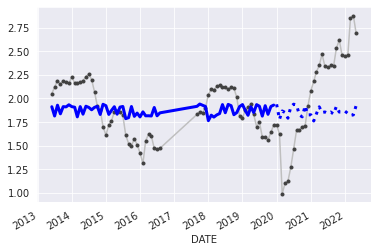

In [16]:
plt.figure(figsize=(40, 10))

# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = Y.plot(**plot_params, x_compat = True)
ax = X_train_pred.plot(ax=ax,
                       linewidth=3,
                       color = 'b')

ax = X_test_pred.plot(ax = ax,
                       linewidth=3,
                       color = 'b',
                       style = ':')

## Evaluating

We will use as performance metric the RMSE.
To test this evaluation metric let's try it out on our simple model above.

In [17]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [18]:
y_pred = model.predict(exp_X_test)
y_true = test_inflation_data['T10YIEM'].to_numpy()
rmse(y_true, y_pred)

0.5711796056502395

# Predicting

## Baseline model: MLP with inflation

In [19]:
from sklearn.neural_network import MLPRegressor

exp_X_train, exp_X_test, y = prepare_data_for_sklearn(train_exp_feature_matrix['inflation'], test_exp_feature_matrix['inflation'], train_inflation_data)

exp_model = MLPRegressor(solver = 'lbfgs',
                         max_iter = 1000)
exp_model.fit(exp_X_train, y)

MLPRegressor(max_iter=1000, solver='lbfgs')

In [20]:
men_X_train, men_X_test, _ = prepare_data_for_sklearn(train_men_feature_matrix['inflation'], test_men_feature_matrix['inflation'], train_inflation_data)

men_model = MLPRegressor(solver = 'lbfgs',
                         max_iter = 1000)
men_model.fit(men_X_train, y)

MLPRegressor(max_iter=1000, solver='lbfgs')

In [21]:
Y, exp_X_train_pred, exp_X_test_pred = prepare_data_for_plotting(exp_X_train, exp_X_test, inflation_data, exp_model)

_, men_X_train_pred, men_X_test_pred = prepare_data_for_plotting(men_X_train, men_X_test, inflation_data, men_model)

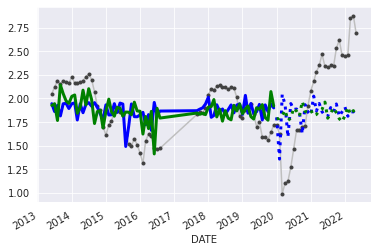

In [22]:


# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals


plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = Y.plot(**plot_params, x_compat = True)
ax = exp_X_train_pred.plot(ax=ax,
                       linewidth=3,
                       color = 'b')

ax = exp_X_test_pred.plot(ax = ax,
                      linewidth=3,
                      color = 'b',
                      style = ':')


ax = men_X_train_pred.plot(ax=ax,
                           linewidth=3,
                           color = 'g')

ax = men_X_test_pred.plot(ax = ax,
                          linewidth=3,
                          color = 'g',
                          style = ':')



## MLP with all the data

In [23]:
from sklearn.neural_network import MLPRegressor

exp_X_train, exp_X_test, y = prepare_data_for_sklearn(train_exp_feature_matrix, test_exp_feature_matrix, train_inflation_data)

exp_model_complete_data = MLPRegressor(solver = 'lbfgs',
                            max_iter = 1000)

exp_model_complete_data.fit(exp_X_train, y)

MLPRegressor(max_iter=1000, solver='lbfgs')

In [24]:
men_X_train, men_X_test, y = prepare_data_for_sklearn(train_men_feature_matrix, test_men_feature_matrix, train_inflation_data)

men_model_complete_data = MLPRegressor(solver = 'lbfgs',
                                       max_iter = 1000)

men_model_complete_data.fit(men_X_train, y)

MLPRegressor(max_iter=1000, solver='lbfgs')

In [25]:
Y, exp_X_train_pred, exp_X_test_pred = prepare_data_for_plotting(exp_X_train, exp_X_test, inflation_data, exp_model_complete_data)

_, men_X_train_pred, men_X_test_pred = prepare_data_for_plotting(men_X_train, men_X_test, inflation_data, men_model_complete_data)

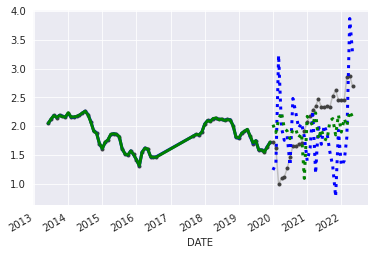

In [26]:

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = Y.plot(**plot_params, x_compat = True)
ax = exp_X_train_pred.plot(ax=ax,
                           linewidth=3,
                           color = 'b')

ax = exp_X_test_pred.plot(ax = ax,
                          linewidth=3,
                          color = 'b',
                          style = ':')


ax = men_X_train_pred.plot(ax=ax,
                           linewidth=3,
                           color = 'g')

ax = men_X_test_pred.plot(ax = ax,
                          linewidth=3,
                          color = 'g',
                          style = ':')

## Finding the best features

Let's try on the test set different models, and select the features that return the highest accuracy.

In [27]:
feature_combinations = [
    'inflation',
    'finance',
    'real_estate',
    ['inflation', 'finance'],
    ['inflation', 'real_estate'],
    ['bitcoin', 'inflation', 'finance'],
    ['real_estate', 'finance', 'inflation', 'energy'],
    ['bitcoin', 'energy', 'finance', 'inflation', 'real_estate']
]

In [28]:
# usually the best models have ['inflation'] or ['inflation', 'real_estate']
rmse_list = []

for features in feature_combinations:
    exp_X_train, exp_X_test, y = prepare_data_for_sklearn(train_exp_feature_matrix[features], test_exp_feature_matrix[features], train_inflation_data)

    exp_model = MLPRegressor(solver = 'lbfgs',
                                           max_iter = 1000)

    exp_model.fit(exp_X_train, y)
    y_pred = exp_model.predict(exp_X_test)
    y_true = test_inflation_data['T10YIEM'].to_numpy()
    rmse_list.append(rmse(y_true, y_pred))

/home/jack/Desktop/uni/DDE/project/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jack/Desktop/uni/DDE/project/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jack/Desktop/uni/DDE/project/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: C

In [29]:
rmse_list

[0.6015454847533637,
 0.6128225619686022,
 0.7193996426882778,
 1.573031256302877,
 0.6596131743367264,
 0.8818355965296855,
 2.157391975653514,
 0.8531208297440808]